<a href="https://colab.research.google.com/github/rgukhui/cm4709/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CM4709 Computer Vision
#Lab 1 Introduction to OpenCV

##Aims

1. Set up your Google Colab environment.
1. Loading and showing images using OpenCV.
1. Reading and saving frames in a video.

##Using Colab

Google Colab is a handy environement for Python as most common libraries are installed. It is free. All you need is a Google account.

It will be useful to organise your files by folders in GoogleDrive.
labs:

1. Create a folder in your GoogleDrive. e.g. `cm4709`.
1. Create a subfolder `Lab01` under `cm4709`. We will store all Lab 01 files in this folder.


##Creating a Colab Notebook

1. In GoogleDrive, go to the folder where you want to create your Colab notebook. e.g. `cm4709/Lab01`.
1. Create a new Google Colaboratory notebook file in the folder. It will be named `Untitledxx.ipynb`.
1. Rename the newly created Colab notebook file. e.g. `Lab01_solution.ipynb`.

##Using GoogleDrive in Colab

Colab connects to a "runtime" with a file system but files uploaded to the runtime may not persist across different sessions. Data files are better stored in GoogleDrive.

1. Download the images and video used in Lab 01 from Moodle. Decompress the ZIP to get a folder.
1. In GoogleDrive, navigate to the folder where you want to store the files. If necessary, create a subfolder to organise your files. e.g. `cm4709/Lab01/data`.
1. Upload the image and vidoe files to the GoogleDrive folder.

In your Colab notebook, add the following code to mount your GoogleDrive to a path in the runtime. You will be prompted for permission to connect. An alert email will also be sent to your Gmail:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now you can access the root of your GoogleDrive within Colab by the path `/content/gdrive/MyDrive`.

##References

You may find the followings useful:
* [OpenCV Reference](https://docs.opencv.org/4.7.0/)
* [Matplotlib Reference](https://matplotlib.org/stable/api/index.html)


##Loading and Showing Image Using OpenCV

We will start by loading and showing an image using OpenCV.
1. Add the following code to load an show an image. In this example we are using the Colab "patched" version of `imshow(...)`.
1. See the reference of the `imread(...)` function [here](https://docs.opencv.org/4.7.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56).


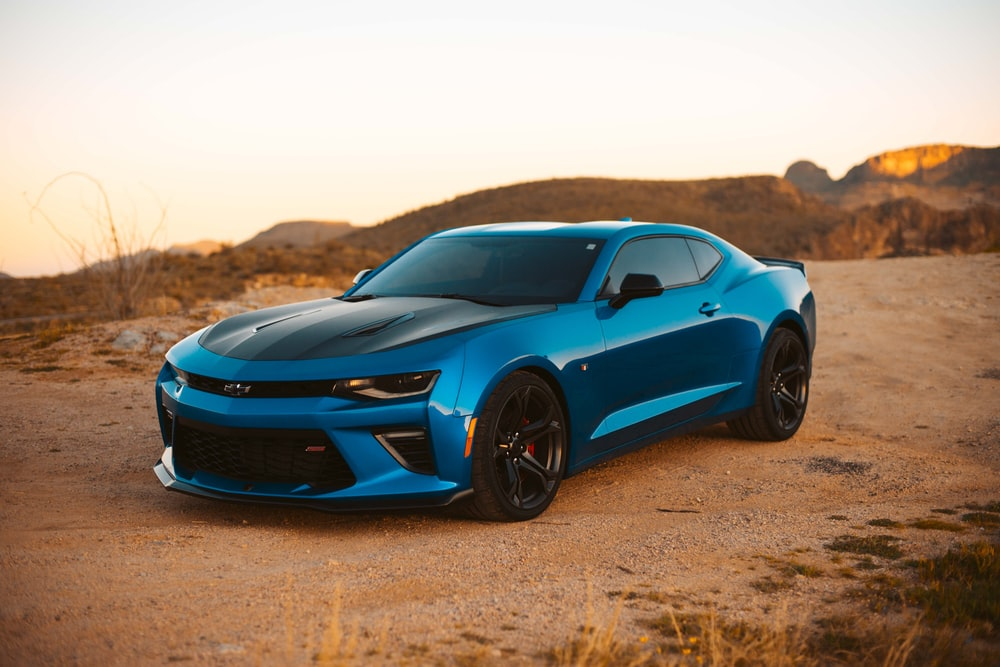

In [ ]:
#import modules
import cv2 as cv       
from google.colab.patches import cv2_imshow

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'                #image file name

image=cv.imread(fileName)   #load image
cv2_imshow(image)           #show image

Note: OpenCV has a function `imshow(...)`. Unfortunately it does not work in Colab (See [this](https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow)).  You can try with the following code. <font color='red'>It will give you an error message:</font>

In [ ]:
import cv2 as cv       

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'                #image file name

image=cv.imread(fileName) #load image
cv.imshow(image)          #show image using OpenCV's imshow(...). It will not work!

DisabledFunctionError: ignored

##Show Image Using MatPlotLab

The image shown may be too big. Using mathplotlab, you can have better control on how to show the image, and putting multiple images in place.

1. Try the following code that shows an image using matplotlib.pyplot.
1. See the reference of `matplotlib.pyplot.imshow(...)` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

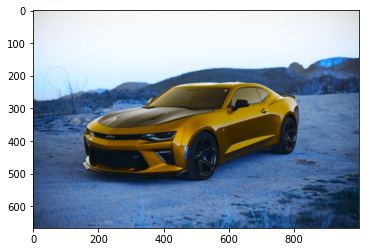

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow   #not used in this example
import matplotlib.pyplot as plt

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name

image=cv.imread(fileName)   #load image
plt.imshow(image)           #show image using matplotlib

##Getting Information of an Image

We can get the "shape" of the image (i.e. the dimension and number of channels) by converting it into an array.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name

image=cv.imread(fileName)   #load image
imageArray=np.array(image)
(height,width,channel)=imageArray.shape
print('width: ',width,' height: ',height,' no. of channels: ',channel)

width:  1000  height:  667  no. of channels:  3


##Splitting an Image into RGB Channels

As you can see above, the RGB channels of the image are in 3 arrays.
We can split the RGB image into its 3 channels of red, green and blue:

In [ ]:
#split RGB array into 3 arrays
redChannel = imageArray[:,:,0]
greenChannel = imageArray[:,:,1]
blueChannel = imageArray[:,:,2]

#print out int arrays
print('Red: ',redChannel)
print('Green: ',greenChannel)
print('Blue: ',blueChannel)

     

Red:  [[215 215 215 ... 214 214 214]
 [215 215 215 ... 215 214 214]
 [213 213 213 ... 215 215 214]
 ...
 [ 35  34  34 ...  22  25  25]
 [ 35  34  34 ...  23  25  28]
 [ 35  35  35 ...  22  28  29]]
Green:  [[215 215 215 ... 215 215 215]
 [215 215 215 ... 216 215 215]
 [215 215 215 ... 216 216 215]
 ...
 [ 51  50  53 ...  34  33  32]
 [ 51  50  53 ...  33  33  32]
 [ 52  52  54 ...  33  32  31]]
Blue:  [[215 215 215 ... 211 211 211]
 [215 215 215 ... 212 211 211]
 [215 215 215 ... 212 212 211]
 ...
 [ 87  86  88 ...  52  50  47]
 [ 87  86  88 ...  50  46  43]
 [ 85  85  89 ...  47  43  41]]


If you want to show multiple images, you will need to use 'subplot' in matplotlib.

1. Try the following code.
1. See the reference of `pyplot.subplot` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).
1. Also check out the references of other functions used.

(-0.5, 999.5, 666.5, -0.5)

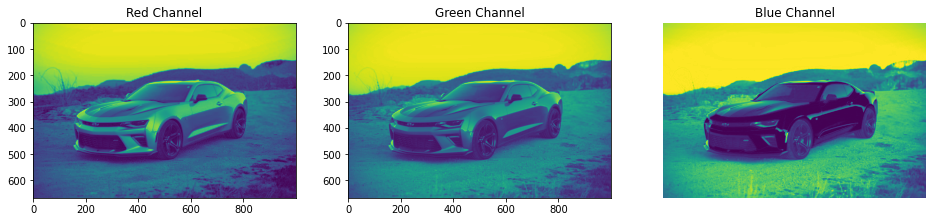

In [ ]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
plt.imshow(redChannel)
plt.title('Red Channel')

plt.subplot(1,3,2)
plt.imshow(greenChannel)
plt.title('Green Channel')

plt.subplot(1,3,3)
plt.imshow(blueChannel)
plt.title('Blue Channel')
plt.axis('off')           #turn off axis if you wish


##Converting to Grayscale

In Computer Vision, we usually work with grayscale images as it reduces the volume of data from 3 channels into 1.

1. Use the following code to convert the colour image to grayscale and show it.

>(Note: To show a grayscale image correctly in pyplot, you need to specify the `cmap` parameter as `gray`.)

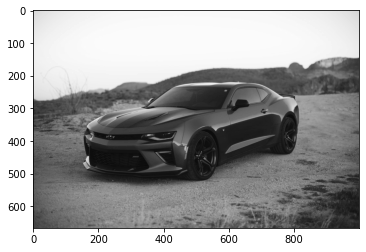

In [ ]:
grayImage=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(grayImage,cmap='gray')

##Counting the Number of Frames in a Video

A video is a sequence of frames. OpenCV allows you to open a video, reads in each frame as an image, and then apply processing to each frame if needed.

1. Try the following code which counts the number of frames in a video.
1. See the reference of `VideoCapture` [here](https://docs.opencv.org/4.7.0/d8/dfe/classcv_1_1VideoCapture.html).

In [ ]:
import cv2 as cv

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
filename=dataFolder+'/EMNIST_GAN_HALF.mp4'    #video file name

cap=cv.VideoCapture(filename) #capture video

#iterate through all video frames until the end
#count the number of frames

count=0
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        count=count+1
    else:
        break
cap.release()
print('No. of frames: ',count)


No. of frames:  731


Alternatively, we can get the number of frames using the `.get(...)` function of the video capture:

In [ ]:
import cv2 as cv

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
filename=dataFolder+'/EMNIST_GAN_HALF.mp4'    #video file name

cap=cv.VideoCapture(filename) #capture video
length=int(cap.get(cv.CAP_PROP_FRAME_COUNT))  #get the video length using get(...)
cap.release()
print('No. of frames: ',length)

No. of frames:  731


##Saving Frames
We can also extract a frame and save it into a file. The following code saves one frame in every 50 frames. The output file format is determined by the file extension:

In [ ]:
import cv2 as cv

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
filename=dataFolder+'/EMNIST_GAN_HALF.mp4'    #video file name
outputFolder=dataFolder+'/output'             #folder to store the frames

# capture video 
cap = cv.VideoCapture(filename)

# how many frames in the file
count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print('No of frames: ',count)

i=0
while (cap.isOpened):
  ret,frame=cap.read()
  if ret==True:
    i=i+1
    #only save 1 in 50 frames
    if i%50 == 0:
      outputFilename=outputFolder+'/frame'+str(i)+'.jpg'  #compose filename
      if cv.imwrite(outputFilename,frame):                #save image
        print('written to: ',outputFilename)
      else:
        print('failed writing to: ',outputFilename)
  else:
    break
cap.release()


No of frames:  731
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame50.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame100.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame150.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame200.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame250.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame300.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame350.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame400.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame450.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame500.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame550.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame600.jpg
written to:  /content/gdrive/MyDrive/cm4709/Lab01/data/output/frame650.jpg
written

##Showing Captured Frames in Files
As the captured frames are now saved as files, we can read and show them using matplotlib. To do this, we use the Python 'glob' module which allows us to find files in a matching path.

No. of files:  28
5 x 6


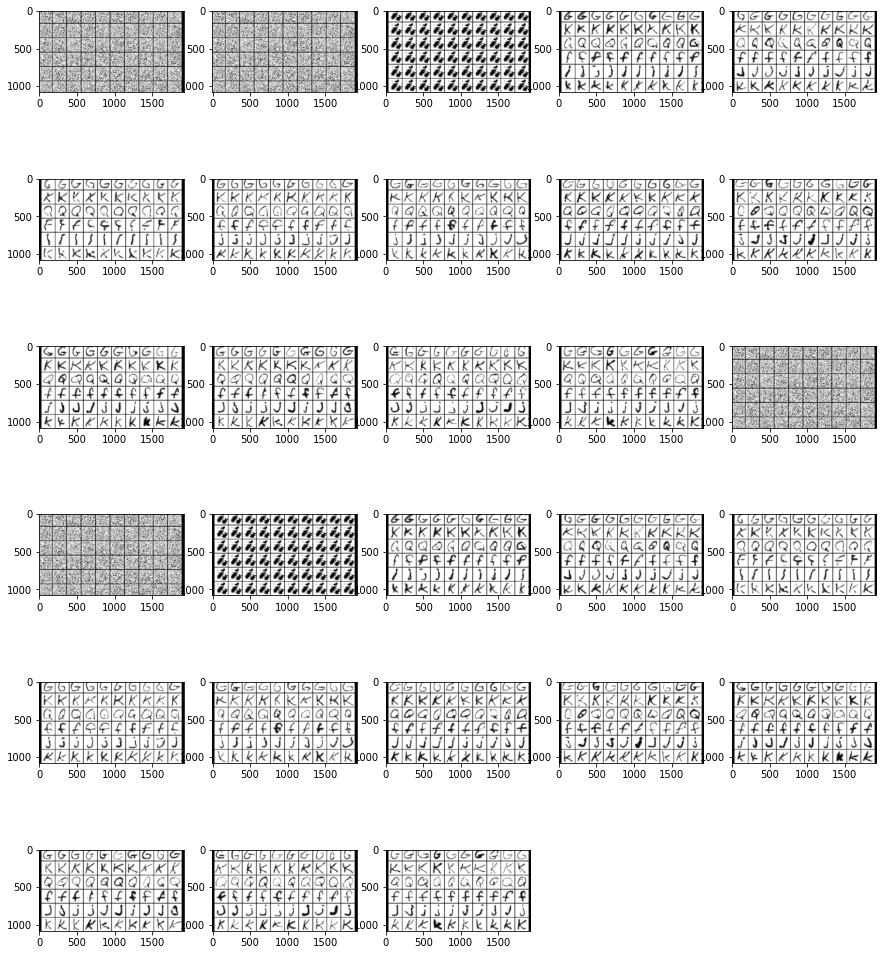

In [ ]:
import cv2 as cv
import glob
import matplotlib.pyplot as plt

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab01/data'  #*** Modify this to your data folder in GoogleDrive
filename=dataFolder+'/EMNIST_GAN_HALF.mp4'    #video file name
outputFolder=dataFolder+'/output'             #folder to store the frames

#use glob to find the matching files
files=glob.glob(outputFolder+'/*.jpg')
print('No. of files: ',len(files))

columns=5                         #to show the images in 5 columns
rows=int(len(files)/columns+1)    #calculate the no. of rows needed
print(columns,'x',rows)           #print out dimension of grid

width=columns*3
height=rows*3
plt.figure(figsize=[width,height])

i=1                           #image index in subplot, start from 1
for imageFile in files:       #iterate through all files matching path pattern
  image=cv.imread(imageFile)  #read file
  plt.subplot(rows,columns,i) #plot it, using index i
  plt.imshow(image)           #show image in plot
  i=i+1


##Tasks
1. Load an image, and resize it to 300*300 pixels. (Hint: Look for a resize function in OpenCV.)
1. Load an image, and resize it to a width of 300 pixel while maintain the aspect ratio.
1. Modify your code so that you do not need to save the frames in a video as files but read and plot them directly.